In [6]:
import sys
import os
from IPython.lib.display import Audio
import matplotlib.pyplot as plt

/home/jugs/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [7]:
import deepspeaker
from deepspeaker.utils.audio_utils import display_audio, get_samples, resample
from deepspeaker.features.feature_extractors import remove_dc_offset, normalize_audio
from deepspeaker.features.feature_extractors import mel_spectrogram, mfcc


Using TensorFlow backend.


In [14]:
sample_audio_path = "/home/jugs/Desktop/Superseded_-_Noisy_speech_database_for_training_speech_enhancement_algorithms_and_TTS_models/noisy_testset_wav/p232_007.wav"

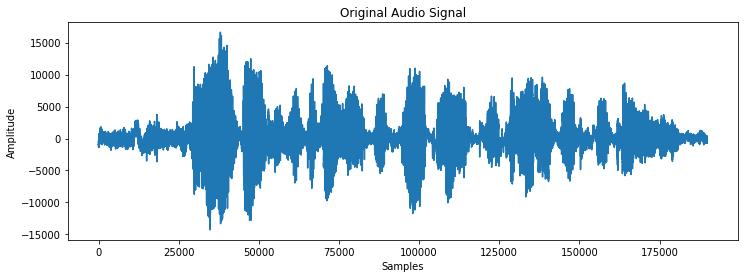

In [15]:
y, sr = get_samples(audio_file_path=sample_audio_path, sr=True)
plt.figure(figsize=(12, 4))
plt.ylabel('Amplitude')
plt.xlabel('Samples')
plt.title("Original Audio Signal")
plt.plot(y)
plt.show()
display_audio(y=y, sr=sr)


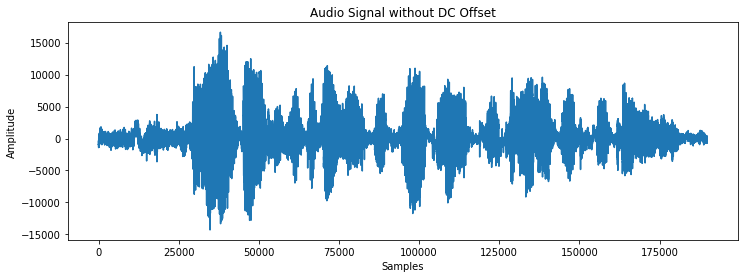

In [16]:
y, sr = get_samples(audio_file_path=sample_audio_path, sr=True)
y = remove_dc_offset(y)
plt.figure(figsize=(12, 4))
plt.ylabel('Amplitude')
plt.xlabel('Samples')
plt.title("Audio Signal without DC Offset")
plt.plot(y)
plt.show()
display_audio(y=y, sr=sr)

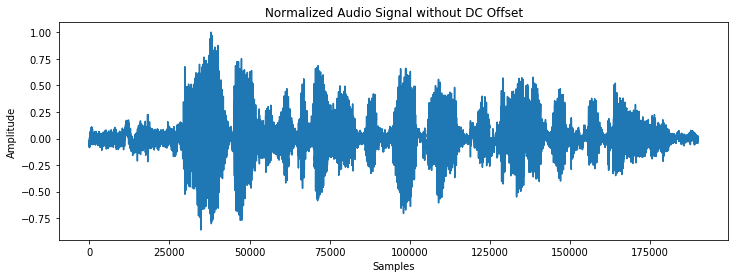

In [17]:
y, sr = get_samples(audio_file_path=sample_audio_path, sr=True)
y = normalize_audio(remove_dc_offset(y))
plt.figure(figsize=(12, 4))
plt.ylabel('Amplitude')
plt.xlabel('Samples')
plt.title("Normalized Audio Signal without DC Offset")
plt.plot(y)
plt.show()
display_audio(y=y, sr=sr)

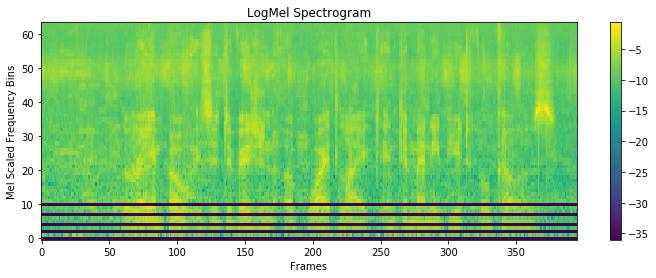

In [26]:
y, sr = get_samples(audio_file_path=sample_audio_path, sr=True)
y = normalize_audio(remove_dc_offset(y))
mel_spec = mel_spectrogram(y=y, sr=sr, nfilt=64, log_mel=True)

plt.figure(figsize=(12, 4))
plt.ylabel('Mel Scaled Frequency Bins')
plt.xlabel('Frames')
plt.title("LogMel Spectrogram")
plt.imshow(mel_spec.T, origin=(0, 0), aspect='auto', cmap='viridis')
plt.colorbar()
plt.show()
display_audio(y=y, sr=sr)

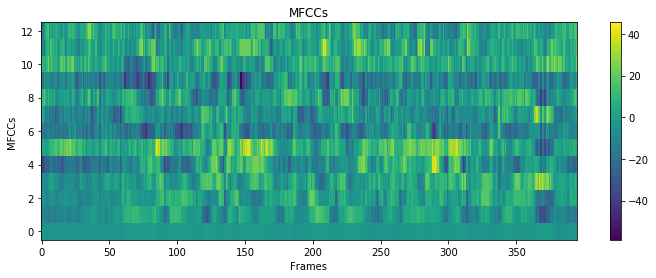

(395, 13)


In [23]:
y, sr = get_samples(audio_file_path=sample_audio_path, sr=True)
y = normalize_audio(remove_dc_offset(y))
mfccs = mfcc(y=y, sr=sr)

plt.figure(figsize=(12, 4))
plt.ylabel('MFCCs')
plt.xlabel('Frames')
plt.title("MFCCs")
plt.imshow(mfccs.T, origin=(0, 0), aspect='auto', cmap='viridis')
plt.colorbar()
plt.show()
print(mfccs.shape)
display_audio(y=y, sr=sr)